# R3 Internal lab - Supervised Learning 


# Building a Student Performace Prediction System



The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [466]:
import pandas as pd
import matplotlib.pyplot as plt
stu=pd.read_csv('students-data-2.csv',delimiter=';')
stu.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Question 2 - drop missing values 
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [467]:
stu.index.name='Number'
print(stu.head())
print(stu.shape)
stu.dropna()
print(stu.shape)
#There are no missing values

       school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
Number                                                                          
0          GP   F   18       U     GT3       A     4     4  at_home   teacher   
1          GP   F   17       U     GT3       T     1     1  at_home     other   
2          GP   F   15       U     LE3       T     1     1  at_home     other   
3          GP   F   15       U     GT3       T     4     2   health  services   
4          GP   F   16       U     GT3       T     3     3    other     other   

        ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
Number  ...                                                                 
0       ...      4        3      4     1     1      3        6   5   6   6  
1       ...      5        3      3     1     1      3        4   5   5   6  
2       ...      4        3      2     2     3      3       10   7   8  10  
3       ...      3        2      2     1     1 

# Transform Data

## Question 3 

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [468]:
stu1=stu.select_dtypes(exclude=np.number)
print(stu.shape)
print(stu1.shape)
print(stu1.head())
#16 integer columns have been removed

(395, 33)
(395, 17)
       school sex address famsize Pstatus     Mjob      Fjob  reason guardian  \
Number                                                                          
0          GP   F       U     GT3       A  at_home   teacher  course   mother   
1          GP   F       U     GT3       T  at_home     other  course   father   
2          GP   F       U     LE3       T  at_home     other   other   mother   
3          GP   F       U     GT3       T   health  services    home   mother   
4          GP   F       U     GT3       T    other     other    home   father   

       schoolsup famsup paid activities nursery higher internet romantic  
Number                                                                    
0            yes     no   no         no     yes    yes       no       no  
1             no    yes   no         no      no    yes      yes       no  
2            yes     no  yes         no     yes    yes      yes       no  
3             no    yes  yes        y

# Question 4 - Drop variables with less variance 

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [469]:
print(stu.shape[1])
stu_var = [col for col in stu.columns if ((stu[[col]].var(axis=0) < 1)).any()]
stu.drop(columns=stu_var, inplace=True)
print(stu.shape[1])

33
27


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 5 - Encode all categorical variables to numerical 

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [470]:
#Getting the string columns from the previous result stu1

from sklearn.preprocessing import LabelEncoder
stu[stu1.columns]=stu[stu1.columns].apply(LabelEncoder().fit_transform)
stu[stu1.columns].head(5)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
Number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


In [373]:
stu.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


# Question 6 - Convert the continuous values of grades into classes 

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [471]:
stu[['G1','G2','G3']].head(10)

,G1,G2,G3
Number,,,
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10
5,15,15,15
6,12,12,11
7,6,5,6
8,16,18,19


In [472]:
stu [['G1','G2','G3']] = np.where(stu[['G1','G2','G3']] >= 10, 1, 0)
stu[['G1','G2','G3']].head(10)

,G1,G2,G3
Number,,,
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1
5,1,1,1
6,1,1,1
7,0,0,0
8,1,1,1


# Question 7 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

Answer

In [473]:
X = stu.drop(columns='G3', inplace=False)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
Number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


In [474]:
Y=stu[['G3']]
Y.head()

,G3
Number,
0,0
1,0
2,1
3,1
4,1


# Question 8 - Training and testing data split

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [378]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=300, random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 26)
(95, 26)
(300, 1)
(95, 1)


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Question 9 - Model Implementation and Testing the Accuracy 

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [379]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [380]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict_test = model.predict(x_test)
y_predict_train = model.predict(x_train)
print(y_predict_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1]


In [381]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.92      0.89      0.91        66

   micro avg       0.87      0.87      0.87        95
   macro avg       0.85      0.86      0.85        95
weighted avg       0.88      0.87      0.87        95



In [382]:
#Test accuracy score

test_accuracy_score = metrics.accuracy_score(y_test, y_predict_test)
print("Test Accuracy Score is %1.2f" %(test_accuracy_score*100), "%")


#Train accuracy score
train_accuracy_score = metrics.accuracy_score(y_train, y_predict_train)
print("Train Accuracy Score is %1.2f" %(train_accuracy_score*100), "%")

Test Accuracy Score is 87.37 %
Train Accuracy Score is 92.67 %


## Section 2 - K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

In [9]:
import warnings 
warnings.filterwarnings('ignore')

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1 - Import the data set and print 10 random rows from the data set

In [383]:
flo = pd.read_csv('iris.csv')
flo.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,3,4.7,3.2,1.3,0.2,Iris-setosa
25,26,5.0,3.0,1.6,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
16,17,5.4,3.9,1.3,0.4,Iris-setosa
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
137,138,6.4,3.1,5.5,1.8,Iris-virginica
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
145,146,6.7,3.0,5.2,2.3,Iris-virginica
44,45,5.1,3.8,1.9,0.4,Iris-setosa
27,28,5.2,3.5,1.5,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [387]:
flo.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [388]:
flo.fillna(flo.median(),inplace=True)

In [389]:
flo.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [396]:
from sklearn.preprocessing import LabelEncoder
flo[['Species']] = flo[['Species']].apply(LabelEncoder().fit_transform)
flo.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


## Question 4 - Observe the association of each independent variable with target variable 
Drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

In [409]:
#Correlation matrix with absolute values
corr = flo.corr().abs()
to_drop = [col for col in corr.columns if (corr['Species'][col] < 0.1)]
print(to_drop)

#There is no column with a correlation between -0.1 to 0.1 with the dependent variable

[]


## Question 5 - Observe the independent variables variance 

drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [411]:
to_drop = [col for col in flo.columns if ((flo[[col]].var(axis=0) < 0.1)).any()]
print(to_drop)
#No columns with variance less than 0.1, not dropping any

[]


## Question 6 - Plot the scatter matrix for all the variables 

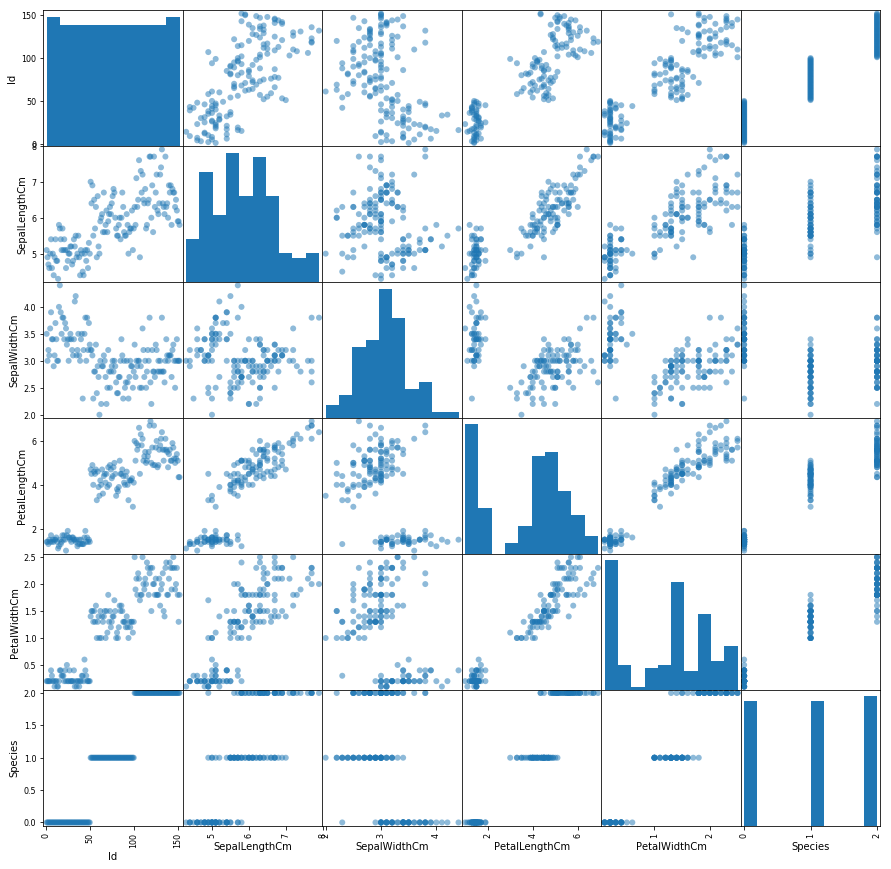

In [434]:
pd.plotting.scatter_matrix(flo,figsize=(15,15), marker='o')
plt.show()

## Split the dataset into training and test sets

## Question 7 - Split the dataset into training and test sets with 80-20 ratio

In [421]:
X = flo.drop(columns=['Id', 'Species'])
Y = flo['Species']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

#Scaling using z-score
from scipy.stats import zscore
x_train_scaled = zscore(x_train)
x_test_scaled = zscore(x_test)

In [424]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(121, 4)
(31, 4)


## Question 8 - Model 

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [426]:
from sklearn.neighbors import KNeighborsClassifier

In [427]:
def run_KNN(k_values):
    mse = []
    mse_lowest = 1.0
    for k in k_values:
        NNH = KNeighborsClassifier(n_neighbors= k , metric='euclidean')
        NNH.fit(x_train_scaled, y_train)
        predicted_labels = NNH.predict(x_test_scaled)
        accuracy_score = metrics.accuracy_score(y_test, predicted_labels)
        print("Accuracy Score for k = %1.0f" %k, "is %1.3f"%(accuracy_score*100), "%")
        mse_val = 1 - accuracy_score
        mse.append(mse_val)
        print("Misclassification Error for k = %1.0f" %k, "is %1.3f"%(mse_val), "%\n ")
        
        if mse_val < mse_lowest:
            mse_lowest = mse_val
            k_lowest = k
            
    print('Model with lowest MSE has a value of %1.3f' %(mse_lowest), " and the best model is k=%1.0f" %(k_lowest))     
    return mse

In [428]:
mse = run_KNN([3,5,9])

Accuracy Score for k = 3 is 90.323 %
Misclassification Error for k = 3 is 0.097 %
 
Accuracy Score for k = 5 is 90.323 %
Misclassification Error for k = 5 is 0.097 %
 
Accuracy Score for k = 9 is 87.097 %
Misclassification Error for k = 9 is 0.129 %
 
Model with lowest MSE has a value of 0.097  and the best model is k=3


## Question 9 - Cross Validation 

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [429]:
k_values = []
for num in range(1, 20): 
    if num % 2 != 0:
        k_values.append(num)
        
k_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [430]:
mse = run_KNN(k_values)

Accuracy Score for k = 1 is 87.097 %
Misclassification Error for k = 1 is 0.129 %
 
Accuracy Score for k = 3 is 90.323 %
Misclassification Error for k = 3 is 0.097 %
 
Accuracy Score for k = 5 is 90.323 %
Misclassification Error for k = 5 is 0.097 %
 
Accuracy Score for k = 7 is 83.871 %
Misclassification Error for k = 7 is 0.161 %
 
Accuracy Score for k = 9 is 87.097 %
Misclassification Error for k = 9 is 0.129 %
 
Accuracy Score for k = 11 is 87.097 %
Misclassification Error for k = 11 is 0.129 %
 
Accuracy Score for k = 13 is 93.548 %
Misclassification Error for k = 13 is 0.065 %
 
Accuracy Score for k = 15 is 93.548 %
Misclassification Error for k = 15 is 0.065 %
 
Accuracy Score for k = 17 is 93.548 %
Misclassification Error for k = 17 is 0.065 %
 
Accuracy Score for k = 19 is 90.323 %
Misclassification Error for k = 19 is 0.097 %
 
Model with lowest MSE has a value of 0.065  and the best model is k=13


## Question 10 - Plot

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

Text(0, 0.5, 'Misclassification Error')

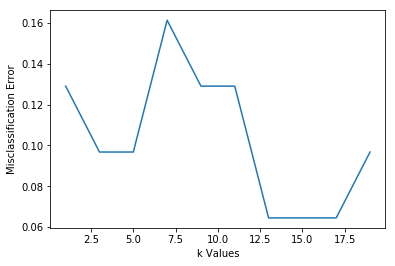

In [433]:
plt.plot(k_values, mse)
plt.xlabel('k Values')
plt.ylabel('Misclassification Error')

## Section 3 - Optional - Naive Bayes with Iris Data

The below section is optional and will not be graded


In [7]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

Problem statement
Dataset
The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

Attributes of the dataset: https://archive.ics.uci.edu/ml/datasets/Iris

### Load the iris data set 

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [ ]:
#Check the dataset
print(y)
print(X)

# Question 1 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

# Question 2 
Find Correlation among all variables and give your insights

### Split data in Training and test set in 80:20.

# Question 3 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

# Question 4 
Train and Fit NaiveBayes Model

In [ ]:
#Fit the model

In [ ]:
#Predict

# Question 5 
Print Accuracy and Confusion Matrix and Conclude your findings

In [ ]:
# show Confusion Matrix

In [ ]:
# show accuracy

In [ ]:
#Show precision and Recall metrics